# Preparation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
directory = r'C:\Users\DELL\OneDrive\เดสก์ท็อป\King Power'
os.chdir(directory)
print(os.getcwd())

C:\Users\DELL\OneDrive\เดสก์ท็อป\King Power


In [3]:
#read file
data = pd.read_csv('telco.csv')
data = data.dropna()
data.count()

customerID          7043
Region              7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [4]:
data.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  1) What is the current churn rate of this Telco company?

In [5]:
CntCust = data.count()['customerID']
CntChurn = data[data['Churn']=='Yes'].count()['customerID']
ChurnRate = CntChurn/CntCust
print("%.2f%%" % (ChurnRate*100))

26.54%


# Ans : 1
Current churn rate = 26.54%

# 2) What is median of tenure of the customers? 

In [6]:
data['tenure'].median()

29.0

# Ans : 2 
Median of tenure of the customers = 29 years

# 3) What is the difference in churn rate of female senior citizens who use Fibre Optic and DSL? 

                 Total Customer  Total Churn Customer  Churn Rate
InternetService                                                  
DSL                         123                    38    0.308943
Fiber optic                 424                   199    0.469340
No                           21                     3    0.142857


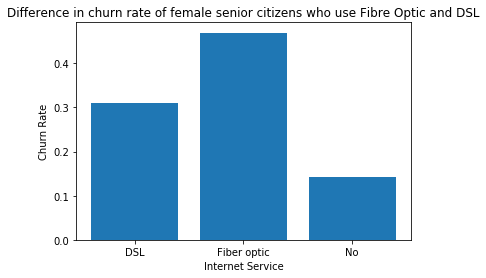

In [7]:
DataIS = pd.DataFrame()
CntCustIS = data[(data['SeniorCitizen']==1) & (data['gender']=='Female')].groupby(['InternetService']).count()['customerID']
ChurnCustIS = data[(data['Churn']=='Yes') & (data['SeniorCitizen']==1) & (data['gender']=='Female')].groupby(['InternetService']).count()['customerID']

DataIS['Total Customer'] = CntCustIS
DataIS['Total Churn Customer'] = ChurnCustIS
DataIS['Churn Rate'] = DataIS['Total Churn Customer'] / DataIS['Total Customer']

plt.bar(DataIS.index,DataIS['Churn Rate'])
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.title('Difference in churn rate of female senior citizens who use Fibre Optic and DSL')
print(DataIS)
plt.show()

# Ans : 3 
Churn rate of customer who use fiber optic and DSL are 46.9% and 30.9% respectively, so the difference of churn rate is 13%.

# 4) Can Fiber optic customers opt out from phone service?

In [8]:
CustFiberPhone = data[(data['InternetService']=='Fiber optic' )& (data['PhoneService']=='Yes')]
CustFiberPhoneChurn = pd.DataFrame(CustFiberPhone.groupby(['InternetService','PhoneService','Churn']).count()['customerID'])
CustFiberPhoneChurn

customerID
InternetService PhoneService Churn            
Fiber optic     Yes          No           1799
                             Yes          1297

# Ans : 4 
Yes, because there're 1,297 customers who churn after use internet service(fiber optic) and phone service.

# 5) Which services do not have tech support? 

In [9]:

DistServ = data[[ 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

DistServ = DistServ.drop_duplicates()
AggDistServ = pd.DataFrame(DistServ.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies']).count()['TechSupport'])

AggDistServ[AggDistServ['TechSupport']<2]

TechSupport
PhoneService MultipleLines InternetService OnlineSecurity      OnlineBackup        DeviceProtection    StreamingTV         StreamingMovies                 
Yes          No            No              No internet service No internet service No internet service No internet service No internet service            1
             Yes           No              No internet service No internet service No internet service No internet service No internet service            1

In [10]:
DistServ[DistServ['InternetService']=='No']

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


# Ans : 5
Customes who only use phone service don't have tech support.

# 6) Is this statement true? And why do you think so? “The churn rate increases as the customers pay higher monthly charges” 

(array([1797., 1004., 1368., 1822., 1052.]),
 array([ 18.25,  38.35,  58.45,  78.55,  98.65, 118.75]),
 <a list of 5 Patch objects>)

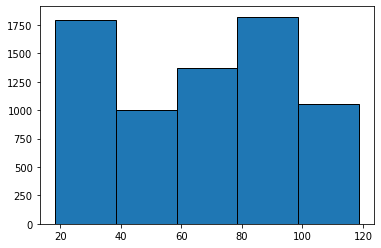

In [11]:
#plot barchart to check monthly charges of customers

plt.hist(data['MonthlyCharges'],bins=5,edgecolor = 'k')

In [12]:
# Create function for calculate churn rate by service(s)
def CalChurnRate(data,field):
    df = pd.DataFrame()
    df['Total Customer'] = data.groupby(field).size()
    df['Churn'] = data[data['Churn']=='Yes'].groupby(field).size()
    df['Churn Rate'] = df['Churn']/df['Total Customer']
    return df

# Gruop customers by monthly charges  for calculate churn rate in each group
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'],[0,20,40,60,80,100,120])

AggCustMonthlyCharges = CalChurnRate(data,['MonthlyChargesBin'])

AggCustMonthlyCharges

,Total Customer,Churn,Churn Rate
MonthlyChargesBin,,,
"(0, 20]",656,58,0.088415
"(20, 40]",1182,156,0.131980
"(40, 60]",1080,276,0.255556
"(60, 80]",1459,473,0.324195
"(80, 100]",1764,653,0.370181
"(100, 120]",902,253,0.280488


# Ans : 6
True for customers who have monthly charges less than 100 USD, the churn rate increases as the customers pay higher monthly charges. But for customers who have monthly charges more than 100 USD, churn rate of customers in this group is less than customer who have 60-80 USD monthly charges.

# 7) Do you think additional services such as Online backup, Online Security,  and tech support are important from customers’ perspective? Why do you think so? 

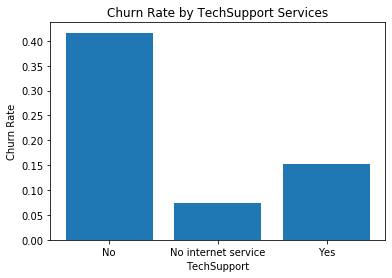

In [13]:
OnlineSecurityChurn = CalChurnRate(data,['OnlineSecurity'])
OnlineBackupChurn = CalChurnRate(data,['OnlineBackup'])
TechSupportChurn = CalChurnRate(data,['TechSupport'])

plt.bar(TechSupportChurn.index,TechSupportChurn['Churn Rate'])
plt.title('Churn Rate by TechSupport Services')
plt.ylabel('Churn Rate')
plt.xlabel('TechSupport')
plt.show()

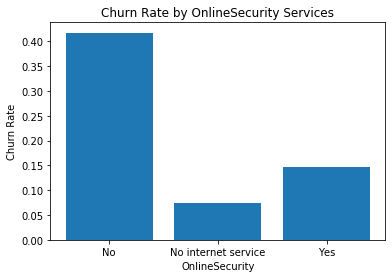

In [14]:
plt.bar(OnlineSecurityChurn.index,OnlineSecurityChurn['Churn Rate'])
plt.title('Churn Rate by OnlineSecurity Services')
plt.ylabel('Churn Rate')
plt.xlabel('OnlineSecurity')
plt.show()

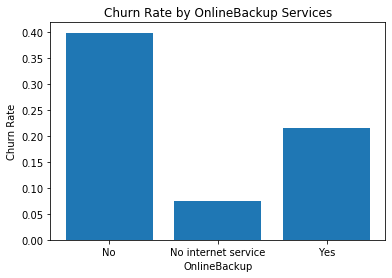

In [15]:
plt.bar(OnlineBackupChurn.index,OnlineBackupChurn['Churn Rate'])
plt.title('Churn Rate by OnlineBackup Services')
plt.ylabel('Churn Rate')
plt.xlabel('OnlineBackup')
plt.show()

# Ans : 7
Yes because customers who have additional services tend to have less churn rate than customers who don't.

# 8 Would you recommend the Telco company to target customers who are singles? Why do you think so? 

In [16]:
# Check if customers who is single tend to use high monthly charges services or not

PartnerChargeBin = pd.DataFrame(data.groupby(['MonthlyChargesBin','Partner']).count()['customerID']).reset_index()
TrnsPartnerChargeBin = PartnerChargeBin.sort_values('MonthlyChargesBin').groupby('MonthlyChargesBin')['customerID'].apply(lambda df: df.reset_index(drop=True)).unstack()

TrnsPartnerChargeBin['%Single']= TrnsPartnerChargeBin[0]/(TrnsPartnerChargeBin[1]+TrnsPartnerChargeBin[0])
TrnsPartnerChargeBin

,0,1,%Single
MonthlyChargesBin,,,
"(0, 20]",360,296,0.548780
"(20, 40]",623,559,0.527073
"(40, 60]",667,413,0.617593
"(60, 80]",819,640,0.561343
"(80, 100]",832,932,0.471655
"(100, 120]",340,562,0.376940


In [17]:
# Calculate churn rate of customers who have partner and who is single.
PartnerChurn = CalChurnRate(data,['Partner'])
PartnerChurn

,Total Customer,Churn,Churn Rate
Partner,,,
No,3641,1200,0.329580
Yes,3402,669,0.196649


# Ans : 8
No because customers who are single tend to use low monthly charges services and have higher churn rate when comparing to customers who have partner.

# 9) Which service you think has serious problems and would recommend the executive of this Telco company to look into?

In [18]:
Services = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
ChurnByServices = pd.DataFrame()
for i in Services:
    a = CalChurnRate(data[data[i]=='Yes'],[i]).reset_index()

    ChurnByServices[i] = a[a[i]=='Yes']['Churn Rate']
    
InternetServiceChurn = CalChurnRate(data,['InternetService'])

ChurnByServices


,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0.267096,0.286099,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414


In [19]:
CalChurnRate(data,['InternetService'])

,Total Customer,Churn,Churn Rate
InternetService,,,
DSL,2421,459,0.189591
Fiber optic,3096,1297,0.418928
No,1526,113,0.074050


# Ans : 9 
Customers who use fiber optic in internet services have high churn rate compare to other services, so I believe that this service is should be the top priority to concern.

# 10) What features/attributes you think are the most predictive to churn behavior? List the top 3 features with back up analysis. 


In [20]:
#Prepare Data
data = pd.read_csv('telco.csv')
data_var = data.drop(['customerID','Churn'],axis=1)
data_target = pd.DataFrame(data['Churn'])

#Prepare categorical features for encoder
data_for_label = data[[ 'Region', 'gender','Partner','Dependents', 'PhoneService', 'MultipleLines',
                                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                   'PaperlessBilling', 'PaymentMethod']]
data_not_label = data[['SeniorCitizen','tenure','TotalCharges','MonthlyCharges']]

data_not_label2 = pd.DataFrame()
for col in data_not_label.columns:
    data_not_label2[col] = pd.to_numeric(data_not_label[col],errors='coerce')


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
# Encode categorical features
data_for_label2 = pd.DataFrame()
for col in data_for_label.columns:
    data_for_label2[col] =label_encoder.fit_transform(data_for_label[col]) 

data_target['Churn'] = label_encoder.fit_transform(data_target['Churn']) 

In [23]:
#merge all features together

data_encoded = data_for_label2.merge(data_not_label2,left_on = data_for_label2.index,right_on = data_not_label2.index).drop(['key_0'],axis=1)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
# Ignore warning in sklearn

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [26]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(data_encoded, data_target)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False False False False False False False  True False False False False
 False  True  True False False False False False]
Feature Ranking: [11  8 16  2  6  7 13  1  5 10  3 17 15  1  1 12  4  9 18 14]


In [27]:
print(CalChurnRate(data,['OnlineSecurity']))
print(CalChurnRate(data,['Contract']))
print(CalChurnRate(data,['PaperlessBilling']))

                     Total Customer  Churn  Churn Rate
OnlineSecurity                                        
No                             3498   1461    0.417667
No internet service            1526    113    0.074050
Yes                            2019    295    0.146112
                Total Customer  Churn  Churn Rate
Contract                                         
Month-to-month            3875   1655    0.427097
One year                  1473    166    0.112695
Two year                  1695     48    0.028319
                  Total Customer  Churn  Churn Rate
PaperlessBilling                                   
No                          2872    469    0.163301
Yes                         4171   1400    0.335651


# Ans : 10 
After using recursive feature elimination technique from sklearn, the top 3 features to calculate the churn rate are "OnlineSecurity", "Contract', "PaperlessBilling". If we check the churn rate between types or customers in each features, we'll see the high different churn rate between types. 